In [1]:
from DDPG import DDPG

In [2]:
class DDPGConfig:
    env_name: str              = "MountainCarContinuous-v0"  # Environment name
    device: str                = "cpu"     # Torch device
    checkpoint: bool           = False     # Periodically save model weights
    num_checkpoints: int       = 20        # Number of checkpoints/printing logs to create
    verbose: bool              = True      # Verbose printing
    total_steps: int           = 200_000   # Total training steps
    target_reward: int         = 94.       # Target reward used for early stopping
    learning_starts: int       = 1_000     # Begin learning after this many steps
    gamma: float               = 0.99      # Discount factor
    lr: float                  = 3e-4      # Learning rate
    hidden_dim: int            = 256       # Actor and critic network hidden dim
    buffer_capacity: int       = 50_000    # Maximum replay buffer capacity
    batch_size: int            = 64        # Batch size used by learner
    tau: float                 = 0.005     # Soft target network update interpolation coefficient
    grad_norm_clip: float      = 140       # Global gradient clipping value
    noise_sigma: float         = 0.1       # OU noise standard deviation
    noise_theta: float         = 0.15      # OU noise reversion rate

In [3]:
config = DDPGConfig()
ddpg = DDPG(config)
ddpg.train()

Progress  |      Step  |   Episode  |  Mean Rew  |  Mean Len  |      Time
    5.0%  |    10,000  |        11  |     -3.70  |     999.0  |  00:00:29
   10.0%  |    20,000  |        21  |     -3.38  |     999.0  |  00:01:00
   15.0%  |    30,000  |        31  |     -4.17  |     999.0  |  00:01:31
   20.0%  |    40,000  |        41  |     -4.95  |     999.0  |  00:02:05
   25.0%  |    50,000  |        55  |     84.98  |     307.8  |  00:02:39
   30.0%  |    60,000  |       133  |     91.15  |     109.4  |  00:03:13
   31.8%  |    63,500  |       170  |     94.64  |      74.6  |  00:03:23
Target reward achieved. Training stopped.


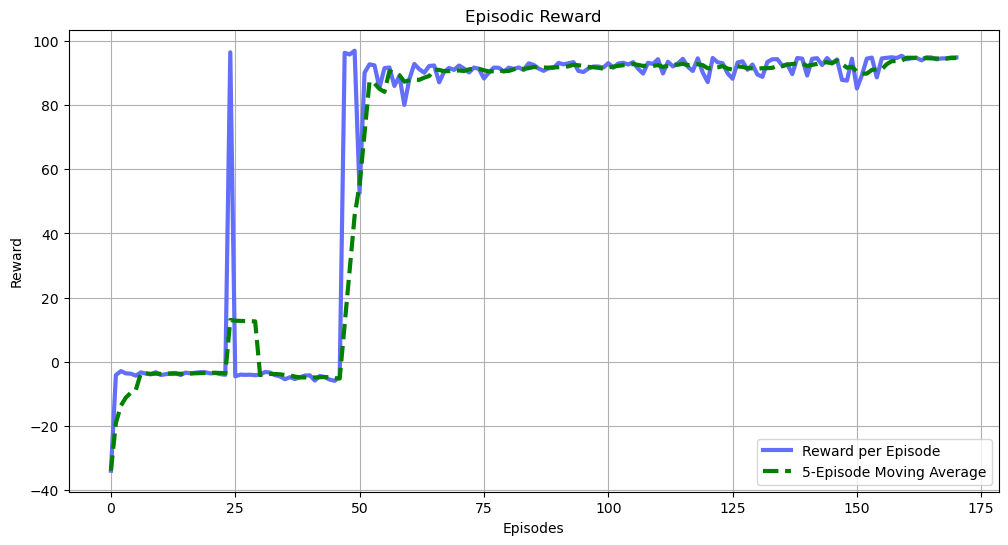

In [4]:
import matplotlib.pyplot as plt
import numpy as np
def plot_rewards(logs, window=5):
    rewards = logs.episode_returns
    moving_avg_rewards = [np.mean(rewards[max(0, i-window):i+1]) for i in range(len(rewards))]

    plt.figure(figsize=(12, 6))
    plt.plot(rewards, label='Reward per Episode', lw=3, c='#636EFA')
    plt.plot(moving_avg_rewards, label=f'{window}-Episode Moving Average', lw=3, c='green', ls='--', alpha=1)
    plt.xlabel('Episodes')
    plt.ylabel('Reward')
    plt.title('Episodic Reward')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_rewards(ddpg.logger, window=5)